In [ ]:
#librairies needed for Step1
import pandas as pd
import glob

#librairies needed for step 3
import spacy

import nltk

In [ ]:
from google.colab import  drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


## Step 1

During this step, I'm going to read the .ann files and then to create a dataframe which will contain two columns :

- The ID that appears first on each line ( T1, T2, R1, R2, etc. )
- The rest of the annotation text which is separated from the ID by a single TAB character

In [ ]:
path = '/drive/My Drive/annotations' # path of annotated files
all_files1 = glob.glob(path + "/*.ann")

In [ ]:
# create empty list to hold dataframes from files found
dfs = []
# for each file in the path above ending .ann
for file in all_files1:
    #open the file
    df = pd.read_csv(file, sep='^([^\s]*)\s', engine='python', header=None).drop(0, axis=1)
    #add this new (temp during the looping) frame to the end of the list
    dfs.append(df)

At this point we have a list of frames with each list item as one .ann file.  

For example : [annFile1, annFile2, etc.]


In [ ]:
dfs

[      1                                                  2
 0    T1                         Attacker 169 177\tLuckyCat
 1    T2                     Address 233 246\t199.192.152.*
 2    T3                       Time 650 664\tFriday Apri 13
 3    R1                      hasAttackTime Arg1:T1 Arg2:T3
 4    T4                          Malware 1530 1536\tSabPub
 5    T5      Indicator 2126 2150\te3SCNUA2Om97ZXJ1fGI+Y4Bt
 6    T6          Indicator 2220 2240\tOjlDLjw5Pi4+NUAuQDBA
 7    T7                          Malware 1839 1845\tSabPub
 8    R2                          indicates Arg1:T5 Arg2:T7
 9    R3                          indicates Arg1:T6 Arg2:T7
 10   T8  Dropper 2605 2635\tExploit.MSWord.CVE-2009-0563.a
 11   T9                       Malware 2722 2731\tMaControl
 12  T10                           File 2883 2891\t8958.doc
 13  T11    MD5 3052 3084\t40C8786A4887A763D8F3E5243724D1C9
 14  T12               File 3254 3274\t10th March Statemnet
 15  T13                          Malwar

In [ ]:
#handle a list that is empty
if len(dfs) == 0:
    print('No files found.')
    #create a dummy frame
    df = pd.DataFrame()
#or have only one item/frame and get it out
elif len(dfs) == 1:
    df = dfs[0]
#or concatenate more than one frame together
else: 
    df = pd.concat(dfs, ignore_index=True)
    df = df.reset_index(drop=True)


In [ ]:
#check what we've got
print(df.head(6))

    1                                              2
0  T1                     Attacker 169 177\tLuckyCat
1  T2                 Address 233 246\t199.192.152.*
2  T3                   Time 650 664\tFriday Apri 13
3  R1                  hasAttackTime Arg1:T1 Arg2:T3
4  T4                      Malware 1530 1536\tSabPub
5  T5  Indicator 2126 2150\te3SCNUA2Om97ZXJ1fGI+Y4Bt


In [ ]:
i=1 # index of file
df['Text File']=''
for r in range (df.shape[0]):
    if df[1][r]=='T1':
        file="File "+str(i)
        df['Text File'][r]=file
        i=i+1
    else:
        df['Text File'][r]=file 

## Step 2

During the second step, I'm going to keep the entities and get rid of other types of annotation as Relations (R1 , R2 ...), Attributes (A1, A2..) and Events (E1, E2 ..) if they exist. Then, I'm going to split each line to its corresponding Label , offset and keyword. 

In [ ]:
R=[] #list of labels
entity1=[] # the start offsets which identifies each word/text in the document
entity2=[] # the end offsets which identifies each word/text in the document # the specific texts connected to each label
ids=[] #the ids of each annotation
txt=[]

In [ ]:
for i in range (df.shape[0]):
    if df[1][i].startswith('R'):
        ids.append(df[1][i])
        R.append(df[2][i].split(' ')[0])
        entity1.append(df[2][i].split(' ')[1].split(':')[1])
        entity2.append(df[2][i].split(' ')[2].split(':')[1])
        txt.append(df['Text File'][i])

        #start_offset.append(df[2][i].split(' ')[1])
       # end_offset.append(df[2][i].split(' ')[2].split('\t')[0])

In [ ]:
data={'ID':ids,'R':R, 'E1':entity1, 'E2':entity2, 'Text File':txt}
annotation=pd.DataFrame(data)

In [ ]:
annotation.head(20)

,ID,R,E1,E2,Text File
0,R1,hasAttackTime,T1,T3,File 1
1,R2,indicates,T5,T7,File 1
2,R3,indicates,T6,T7,File 1
3,R4,indicates,T10,T13,File 1
4,R5,indicates,T11,T13,File 1
5,R6,hasAttackTime,T19,T18,File 1
6,R7,hasVulnerability,T21,T20,File 1
7,R1,indicates,T3,T2,File 2
8,R2,indicates,T5,T2,File 2
9,R3,indicates,T6,T2,File 2


## Step 3

In [ ]:
annR=annotation.copy()

During this step, I'm going to read the .ann files and then to create a dataframe which will contain two columns :

- The ID that appears first on each line ( T1, T2, R1, R2, etc. )
- The rest of the annotation text which is separated from the ID by a single TAB character

## Step 2

During the second step, I'm going to keep the entities and get rid of other types of annotation as Relations (R1 , R2 ...), Attributes (A1, A2..) and Events (E1, E2 ..) if they exist. Then, I'm going to split each line to its corresponding Label , offset and keyword. 

In [ ]:
df

,1,2,Text File
0,T1,Attacker 169 177\tLuckyCat,File 1
1,T2,Address 233 246\t199.192.152.*,File 1
2,T3,Time 650 664\tFriday Apri 13,File 1
3,R1,hasAttackTime Arg1:T1 Arg2:T3,File 1
4,T4,Malware 1530 1536\tSabPub,File 1
...,...,...,...
10574,T23,Software 15444 15456\tWindows 2003,File 64
10575,T24,Software 16544 16550\tEnCase,File 64
10576,T25,Software 17266 17272\tEnCase,File 64
10577,T26,Malware 18024 18031\tShamoon,File 64


In [ ]:
labels=[] #list of labels
start_offset=[] # the start offsets which identifies each word/text in the document
end_offset=[] # the end offsets which identifies each word/text in the document
words=[] # the specific texts connected to each label
ids=[] #the ids of each annotation
txt=[]

In [ ]:
for i in range (df.shape[0]):
    if df[1][i].startswith('T'):
        ids.append(df[1][i])
        labels.append(df[2][i].split(' ')[0])
        words.append(df[2][i].split('\t')[1])
        start_offset.append(df[2][i].split(' ')[1])
        end_offset.append(df[2][i].split(' ')[2].split('\t')[0])
        txt.append(df['Text File'][i])

In [ ]:
data={'ID':ids,'Label':labels, 'word':words, 'Start offset':start_offset, 'End offset':end_offset, 'Text File':txt}
annotation=pd.DataFrame(data)

In [ ]:
annotation.head(10)

,ID,Label,word,Start offset,End offset,Text File
0,T1,Attacker,LuckyCat,169,177,File 1
1,T2,Address,199.192.152.*,233,246,File 1
2,T3,Time,Friday Apri 13,650,664,File 1
3,T4,Malware,SabPub,1530,1536,File 1
4,T5,Indicator,e3SCNUA2Om97ZXJ1fGI+Y4Bt,2126,2150,File 1
5,T6,Indicator,OjlDLjw5Pi4+NUAuQDBA,2220,2240,File 1
6,T7,Malware,SabPub,1839,1845,File 1
7,T8,Dropper,Exploit.MSWord.CVE-2009-0563.a,2605,2635,File 1
8,T9,Malware,MaControl,2722,2731,File 1
9,T10,File,8958.doc,2883,2891,File 1


## Step 3

In [ ]:
annotation.head()

,ID,Label,word,Start offset,End offset,Text File
0,T1,Attacker,LuckyCat,169,177,File 1
1,T2,Address,199.192.152.*,233,246,File 1
2,T3,Time,Friday Apri 13,650,664,File 1
3,T4,Malware,SabPub,1530,1536,File 1
4,T5,Indicator,e3SCNUA2Om97ZXJ1fGI+Y4Bt,2126,2150,File 1


In [ ]:
# remove extra spaces and ending space if any
spaces = ['\u200b', '\u200e', '\u202a', '\u202c', '\ufeff', '\uf0d8', '\u2061', '\x10', '\x7f', '\x9d', '\xad', '\xa0']
def remove_space(text):
    for space in spaces:
        text = text.replace(space, ' ')
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return text

In [ ]:
all_files=[]
for i in all_files1:
  f=i.split('.')
  y=f[0].split('/')
  p='/drive/My Drive/text/'+y[4]+'.txt'
  all_files.append(p)

In [ ]:
annotation['Sentence']=''
j=0
i=0
for file in all_files:
    j=j+1
    with open(file, 'r', encoding = 'utf-8') as textFile:
        text=textFile.read()
    text= text.replace("\n"," ")
    text= text.replace("("," ")
    text= text.replace(")"," ")
    text= text.replace('“',' ')
    text= text.replace('”',' ')
    text= text.replace('"',' ')
    text = text.replace(". "," .<stop>") 
    text = text.replace("? "," ?<stop>")
    text = text.replace("!"," !<stop>")
    sentences = text.split("<stop>")
    while annotation['Text File'][i]=='File '+str(j):
        b=0
        m=sentences[b]
        while len(m)<int(annotation['Start offset'][i]):
                b=b+1
                m=m+''+sentences[b]
        annotation['Sentence'][i]=sentences[b]
        i=i+1
        if i==annotation.shape[0]:
            break

In [ ]:
annotation.head()

,ID,Label,word,Start offset,End offset,Text File,Sentence
0,T1,Attacker,LuckyCat,169,177,File 1,New Version of OSX.SabPub & Confirmed Mac APT ...
1,T2,Address,199.192.152.*,233,246,File 1,The IP address of the C&C to which this bot co...
2,T3,Time,Friday Apri 13,650,664,File 1,"On Friday Apri 13, port 80 on the C&C server l..."
3,T4,Malware,SabPub,1530,1536,File 1,We can therefore confirm SabPub as APT in acti...
4,T5,Indicator,e3SCNUA2Om97ZXJ1fGI+Y4Bt,2126,2150,File 1,This version differs from the original one onl...


In [ ]:
import re
annotation['SentencePre']=''
for i in range (annotation.shape[0]):
    m=annotation['Sentence'][i]
    m= m.replace(","," , ")
    m= m.replace(": "," : ")
    m = m.replace(";"," ;")
    m=remove_space(m)
    annotation['SentencePre'][i]=m
annotation.head()

,ID,Label,word,Start offset,End offset,Text File,Sentence,SentencePre
0,T1,Attacker,LuckyCat,169,177,File 1,New Version of OSX.SabPub & Confirmed Mac APT ...,New Version of OSX.SabPub & Confirmed Mac APT ...
1,T2,Address,199.192.152.*,233,246,File 1,The IP address of the C&C to which this bot co...,The IP address of the C&C to which this bot co...
2,T3,Time,Friday Apri 13,650,664,File 1,"On Friday Apri 13, port 80 on the C&C server l...","On Friday Apri 13 , port 80 on the C&C server ..."
3,T4,Malware,SabPub,1530,1536,File 1,We can therefore confirm SabPub as APT in acti...,We can therefore confirm SabPub as APT in acti...
4,T5,Indicator,e3SCNUA2Om97ZXJ1fGI+Y4Bt,2126,2150,File 1,This version differs from the original one onl...,This version differs from the original one onl...


In [ ]:
annR.head()

,ID,R,E1,E2,Text File
0,R1,hasAttackTime,T1,T3,File 1
1,R2,indicates,T5,T7,File 1
2,R3,indicates,T6,T7,File 1
3,R4,indicates,T10,T13,File 1
4,R5,indicates,T11,T13,File 1


In [ ]:
annR['EN1']=''
annR['EN2']=''
annR['offset1']=''
annR['offset2']=''
for i in range (annR.shape[0]):
  id1=annotation[(annotation['ID']==annR['E1'][i]) & (annotation['Text File']==annR['Text File'][i])].index.values[0]
  id2=annotation[(annotation['ID']==annR['E2'][i]) & (annotation['Text File']==annR['Text File'][i])].index.values[0]
  en1=annotation[(annotation['ID']==annR['E1'][i]) & (annotation['Text File']==annR['Text File'][i])]['word'][id1]
  en2=annotation[(annotation['ID']==annR['E2'][i]) & (annotation['Text File']==annR['Text File'][i])]['word'][id2]
  off1=annotation[(annotation['ID']==annR['E1'][i]) & (annotation['Text File']==annR['Text File'][i])]['Start offset'][id1]
  off2=annotation[(annotation['ID']==annR['E2'][i]) & (annotation['Text File']==annR['Text File'][i])]['Start offset'][id2]
  annR['EN1'][i]=en1
  annR['EN2'][i]=en2
  annR['offset1'][i]=off1
  annR['offset2'][i]=off2

In [ ]:
annR.head(20)

,ID,R,E1,E2,Text File,EN1,EN2,offset1,offset2
0,R1,hasAttackTime,T1,T3,File 1,LuckyCat,Friday Apri 13,169,650
1,R2,indicates,T5,T7,File 1,e3SCNUA2Om97ZXJ1fGI+Y4Bt,SabPub,2126,1839
2,R3,indicates,T6,T7,File 1,OjlDLjw5Pi4+NUAuQDBA,SabPub,2220,1839
3,R4,indicates,T10,T13,File 1,8958.doc,SabPub,2883,2760
4,R5,indicates,T11,T13,File 1,40C8786A4887A763D8F3E5243724D1C9,SabPub,3052,2760
5,R6,hasAttackTime,T19,T18,File 1,SabPub,February 2012,4864,4963
6,R7,hasVulnerability,T21,T20,File 1,Word,CVE-2009-0563,5016,5048
7,R1,indicates,T3,T2,File 2,~d,Stuxnet,1062,467
8,R2,indicates,T5,T2,File 2,Mrxcls.sys,Stuxnet,1821,467
9,R3,indicates,T6,T2,File 2,Mrxnet.sys 17400,Stuxnet,1852,467


In [ ]:
annR['contexte']=''
j=0
i=0
for file in all_files:
    j=j+1
    with open(file, 'r', encoding = 'utf-8') as textFile:
        text=textFile.read()
    text= text.replace("\n"," ")
    text= text.replace("("," ")
    text= text.replace(")"," ")
    text= text.replace('“',' ')
    text= text.replace('”',' ')
    text= text.replace('"',' ')
    text = text.replace(". "," .<stop>") 
    text = text.replace("? "," ?<stop>")
    text = text.replace("!"," !<stop>")
    sentences = text.split("<stop>")
    while annR['Text File'][i]=='File '+str(j):
        b=0
        m=sentences[b]
        mi=min(int(annR['offset1'][i]),int(annR['offset2'][i]))
        ma=max(int(annR['offset1'][i]),int(annR['offset2'][i]))
        while len(m)<mi:
                b=b+1
                m=m+''+sentences[b]
        s=sentences[b]
        while len(m)<ma:
                b=b+1
                m=m+''+sentences[b]
                s=s+' '+sentences[b]
        annR['contexte'][i]=s
        i=i+1
        if i==annR.shape[0]:
            break

In [ ]:
# remove extra spaces and ending space if any
spaces = ['\u200b', '\u200e', '\u202a', '\u202c', '\ufeff', '\uf0d8', '\u2061', '\x10', '\x7f', '\x9d', '\xad', '\xa0']
def remove_space(text):
    for space in spaces:
        text = text.replace(space, ' ')
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return text

In [ ]:
annR.head(20)

,ID,R,E1,E2,Text File,EN1,EN2,offset1,offset2,contexte
0,R1,hasAttackTime,T1,T3,File 1,LuckyCat,Friday Apri 13,169,650,New Version of OSX.SabPub & Confirmed Mac APT ...
1,R2,indicates,T5,T7,File 1,e3SCNUA2Om97ZXJ1fGI+Y4Bt,SabPub,2126,1839,"While analysing SabPub, we discovered another ..."
2,R3,indicates,T6,T7,File 1,OjlDLjw5Pi4+NUAuQDBA,SabPub,2220,1839,"While analysing SabPub, we discovered another ..."
3,R4,indicates,T10,T13,File 1,8958.doc,SabPub,2883,2760,The remaining two drop SabPub . The most inter...
4,R5,indicates,T11,T13,File 1,40C8786A4887A763D8F3E5243724D1C9,SabPub,3052,2760,The remaining two drop SabPub . The most inter...
5,R6,hasAttackTime,T19,T18,File 1,SabPub,February 2012,4864,4963,To summarize: - At least two variants of the S...
6,R7,hasVulnerability,T21,T20,File 1,Word,CVE-2009-0563,5016,5048,- The malware is being spread through Word doc...
7,R1,indicates,T3,T2,File 2,~d,Stuxnet,1062,467,"In addition, there are other issues, mostly to..."
8,R2,indicates,T5,T2,File 2,Mrxcls.sys,Stuxnet,1821,467,"In addition, there are other issues, mostly to..."
9,R3,indicates,T6,T2,File 2,Mrxnet.sys 17400,Stuxnet,1852,467,"In addition, there are other issues, mostly to..."


In [ ]:
import re
annR['context']=''
for i in range (annR.shape[0]):
    m=annR['contexte'][i]
    m= m.replace(","," , ")
    m= m.replace(": "," : ")
    m = m.replace(";"," ;")
    m=remove_space(m)
    annR['context'][i]=m

In [ ]:
annR['context'].head()

0    New Version of OSX.SabPub & Confirmed Mac APT ...
1    While analysing SabPub , we discovered another...
2    While analysing SabPub , we discovered another...
3    The remaining two drop SabPub . The most inter...
4    The remaining two drop SabPub . The most inter...
Name: context, dtype: object

In [ ]:
text=[]
relation=[]
for i in range(annR.shape[0]):
  result1 = annR['context'][i].find(annR['EN1'][i])
  result2 = annR['context'][i].find(annR['EN2'][i])
  if result1<result2 :
    hash1 = annR['context'][i][:result1] + '<e1>' + annR['context'][i][result1:result1+len(annR['EN1'][i])] + '</e1>' + annR['context'][i][result1+len(annR['EN1'][i]): result2] + '<e2>' + annR['context'][i][result2:result2+len(annR['EN2'][i])]+'</e2>'+ annR['context'][i][result2+len(annR['EN2'][i]):]
    r=annR['R'][i]+'(e1,e2)'
  else:
    hash1 = annR['context'][i][:result2] + '<e1>' + annR['context'][i][result2:result2+len(annR['EN2'][i])] + '</e1>' + annR['context'][i][result2+len(annR['EN2'][i]): result1]  + '<e2>' + annR['context'][i][result1:result1+len(annR['EN1'][i])]+'</e2>'+ annR['context'][i][result1+len(annR['EN1'][i]):]
    r=annR['R'][i]+'(e2,e1)'
  text.append(hash1)
  relation.append(r)

In [ ]:
re=pd.DataFrame({
    'text':text,
    'relation':relation
})

In [ ]:
re.head(20)

,text,relation
0,New Version of OSX.SabPub & Confirmed Mac APT ...,"hasAttackTime(e1,e2)"
1,"While analysing <e1>SabPub</e1> , we discovere...","indicates(e2,e1)"
2,"While analysing <e1>SabPub</e1> , we discovere...","indicates(e2,e1)"
3,The remaining two drop <e1>SabPub</e1> . The m...,"indicates(e2,e1)"
4,The remaining two drop <e1>SabPub</e1> . The m...,"indicates(e2,e1)"
5,To summarize : - At least two variants of the ...,"hasAttackTime(e1,e2)"
6,- The malware is being spread through <e1>Word...,"hasVulnerability(e1,e2)"
7,"In addition , there are other issues , mostly ...","indicates(e2,e1)"
8,"In addition , there are other issues , mostly ...","indicates(e2,e1)"
9,"In addition , there are other issues , mostly ...","indicates(e2,e1)"


In [ ]:
re_suite=pd.read_csv('/drive/My Drive/re1.csv')
re_suite

,Unnamed: 0,text,relation
0,0,This followed a public rebuke in January by Se...,"hasattacklocation(e1,e2)"
1,1,"In the case of <e1>Lazarus</e1> , the attribut...","hasattacklocation(e1,e2)"
2,2,"In the case of <e1>Lazarus</e1> , the attribut...","hasattacklocation(e1,e2)"
3,3,The attack tools found by <e1>Takai</e1> are a...,"hasattacklocation(e1,e2)"
4,4,"In August 1999 , there was a spate of cross - ...","hasattacklocation(e2,e1)"
...,...,...,...
17461,17461,"Next , the attackers use the <e1>Microsoft</e1...","hasattacktime(e1,e2)"
17462,17462,Looking at spam in relation to all emails sent...,"hasattacklocation(e2,e1)"
17463,17463,TEMP.Armaggedon specialized in a mission targe...,"hasattacktime(e1,e2)"
17464,17464,Though down slightly from the 62 % internal de...,"hasattacktime(e2,e1)"


In [ ]:
re1=re_suite.drop(columns='Unnamed: 0')
re1

,text,relation
0,This followed a public rebuke in January by Se...,"hasattacklocation(e1,e2)"
1,"In the case of <e1>Lazarus</e1> , the attribut...","hasattacklocation(e1,e2)"
2,"In the case of <e1>Lazarus</e1> , the attribut...","hasattacklocation(e1,e2)"
3,The attack tools found by <e1>Takai</e1> are a...,"hasattacklocation(e1,e2)"
4,"In August 1999 , there was a spate of cross - ...","hasattacklocation(e2,e1)"
...,...,...
17461,"Next , the attackers use the <e1>Microsoft</e1...","hasattacktime(e1,e2)"
17462,Looking at spam in relation to all emails sent...,"hasattacklocation(e2,e1)"
17463,TEMP.Armaggedon specialized in a mission targe...,"hasattacktime(e1,e2)"
17464,Though down slightly from the 62 % internal de...,"hasattacktime(e2,e1)"


In [ ]:
frames=[re, re1]
df = pd.concat(frames)
df

,text,relation
0,New Version of OSX.SabPub & Confirmed Mac APT ...,"hasAttackTime(e1,e2)"
1,"While analysing <e1>SabPub</e1> , we discovere...","indicates(e2,e1)"
2,"While analysing <e1>SabPub</e1> , we discovere...","indicates(e2,e1)"
3,The remaining two drop <e1>SabPub</e1> . The m...,"indicates(e2,e1)"
4,The remaining two drop <e1>SabPub</e1> . The m...,"indicates(e2,e1)"
...,...,...
17461,"Next , the attackers use the <e1>Microsoft</e1...","hasattacktime(e1,e2)"
17462,Looking at spam in relation to all emails sent...,"hasattacklocation(e2,e1)"
17463,TEMP.Armaggedon specialized in a mission targe...,"hasattacktime(e1,e2)"
17464,Though down slightly from the 62 % internal de...,"hasattacktime(e2,e1)"


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df['relation'].unique()

array(['hasAttackTime(e1,e2)', 'indicates(e2,e1)',
       'hasVulnerability(e1,e2)', 'targets(e1,e2)',
       'hasAttackLocation(e2,e1)', 'belongsTo(e2,e1)',
       'hasAttackLocation(e1,e2)', 'hasAttachment(e1,e2)',
       'exploits(e1,e2)', 'hasVulnerability(e2,e1)', 'exploits(e2,e1)',
       'indicates(e1,e2)', 'hasFamily(e2,e1)', 'hasMember(e1,e2)',
       'hasMember(e2,e1)', 'hasFamily(e1,e2)', 'hasProduct(e1,e2)',
       'hasAttackTime(e2,e1)', 'hasCharacteristics(e1,e2)',
       'usesMalware(e2,e1)', 'targets(e2,e1)', 'hasProduct(e2,e1)',
       'authored(e2,e1)', 'authored(e1,e2)', 'hasAuthor(e1,e2)',
       'hasAuthor(e2,e1)', 'hasCharacteristics(e2,e1)',
       'involvesMalware(e1,e2)', 'connectsTo(e1,e2)', 'connectsTo(e2,e1)',
       'involvesMalware(e2,e1)', 'mitigates(e2,e1)', 'hasType(e2,e1)',
       'usesMalware(e1,e2)', 'mitigates(e1,e2)', 'usesDropper(e2,e1)',
       'usesAddress(e2,e1)', 'usesAddress(e1,e2)', 'usesDropper(e1,e2)',
       'belongsTo(e1,e2)', 'attribute

In [ ]:
todelete=['attributedto(e2,e1)','usesaddress(e2,e1)','hasattachment(e2,e1)','hasfamily(e1,e2)','hasmember(e1,e2)','runssoftware(e1,e2)','attributedto(e1,e2)','hasfamily(e2,e1)',
          'hasmember(e2,e1)','runssoftware(e2,e1)','hasattachment(e1,e2)','usesaddress(e1,e2)','usesDropper(e2,e1)','usesDropper(e2,e1)',
       'usesAddress(e2,e1)', 'usesAddress(e1,e2)','hasType(e2,e1)','connectsTo(e1,e2)', 'connectsTo(e2,e1)','hasAuthor(e1,e2)',
       'hasAuthor(e2,e1)','hasFamily(e2,e1)', 'hasMember(e1,e2)',
       'hasMember(e2,e1)', 'hasFamily(e1,e2)','hasAttachment(e1,e2)','usesdropper(e1,e2)','attributedto(e1,e2)','runssoftware(e2,e1)', 'mitigates(e1,e2)','mitigates(e2,e1)']

In [ ]:
df.loc[df['relation'].isin(todelete),'relation']='other'
df['relation']=df['relation'].str.lower()

In [ ]:
df.head()

,text,relation
0,New Version of OSX.SabPub & Confirmed Mac APT ...,"hasattacktime(e1,e2)"
1,"While analysing <e1>SabPub</e1> , we discovere...","indicates(e2,e1)"
2,"While analysing <e1>SabPub</e1> , we discovere...","indicates(e2,e1)"
3,The remaining two drop <e1>SabPub</e1> . The m...,"indicates(e2,e1)"
4,The remaining two drop <e1>SabPub</e1> . The m...,"indicates(e2,e1)"


In [ ]:
#df.to_csv('/drive/My Drive/re_input.csv')

# Create train and test files before text augmentation

### Split Train / test

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X=df['text'].tolist()
y=df['relation'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                stratify=y, 
                                                test_size=0.25)

In [ ]:
df['relation'].value_counts()

hasattacklocation(e1,e2)     6759
indicates(e2,e1)             3023
hasproduct(e1,e2)            2808
hasproduct(e2,e1)            1633
hasattacklocation(e2,e1)     1363
hasattacktime(e1,e2)         1065
hasattacktime(e2,e1)          911
indicates(e1,e2)              860
targets(e1,e2)                590
other                         498
hascharacteristics(e1,e2)     447
targets(e2,e1)                159
hascharacteristics(e2,e1)     116
authored(e2,e1)                85
exploits(e1,e2)                47
usesmalware(e1,e2)             40
belongsto(e2,e1)               36
hasvulnerability(e1,e2)        35
involvesmalware(e2,e1)         23
usesmalware(e2,e1)             23
authored(e1,e2)                22
involvesmalware(e1,e2)         22
hasvulnerability(e2,e1)        16
exploits(e2,e1)                14
belongsto(e1,e2)               12
Name: relation, dtype: int64

### Turn train and test set into train and test text files 

In [ ]:
import re
# remove extra spaces and ending space if any
spaces = ['\u200b', '\u200e', '\u202a', '\u202c', '\ufeff', '\uf0d8', '\u2061', '\x10', '\x7f', '\x9d', '\xad', '\xa0']
def remove_space(text):
    for space in spaces:
        text = text.replace(space, ' ')
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return text

In [ ]:
pre_train = open("/drive/My Drive/pre_train.txt", "w")
pre_test=open('/drive/My Drive/pre_test.txt',"w")
for i in range (len(X_train)):
  num_sent=i+1
  row=str(num_sent)+"   "+'"'+ (remove_space(X_train[i]).lower()).capitalize() +'"'
  pre_train.write(row)
  pre_train.write("\n")
  pre_train.write(y_train[i])
  pre_train.write("\n")
  pre_train.write("\n")
pre_train.close()
for j in range (len(X_test)):
  number=num_sent+j+1
  row=str(number)+"   "+'"'+(remove_space(X_test[j]).lower()).capitalize() +'"'
  pre_test.write(row)
  pre_test.write("\n")
  pre_test.write(y_test[j])
  pre_test.write("\n")
  pre_test.write("\n")
test.close()

## Apply text augmentation on train set

create train dataframe on which we are going to apply text augmentation

In [ ]:
df=pd.DataFrame({
    'text'=X_train.tolist(),
    'relation'=y_train.tolist()
})

## **Text** **augmentation**

In [ ]:
to_aug=['hascharacteristics(e1,e2)','authored(e2,e1)','exploits(e1,e2)','belongsto(e1,e2)','exploits(e2,e1)','hasvulnerability(e2,e1)','involvesmalware(e1,e2)',
        'authored(e1,e2)','usesmalware(e2,e1)','involvesmalware(e2,e1)','hasvulnerability(e1,e2)','belongsto(e2,e1)','usesmalware(e1,e2)']

In [ ]:
pip install nlpaug

In [ ]:
# Install and import nlpaug package.
!cp -r ../input/nlpaug-from-github/nlpaug-master ./
!pip install nlpaug-master/
!rm -r nlpaug-master

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.word.context_word_embs as nawcwe
import nlpaug.augmenter.word.word_embs as nawwe
import nlpaug.augmenter.word.spelling as naws

cp: cannot stat '../input/nlpaug-from-github/nlpaug-master': No such file or directory
ERROR: Invalid requirement: 'nlpaug-master/'
Hint: It looks like a path. File 'nlpaug-master/' does not exist.
rm: cannot remove 'nlpaug-master': No such file or directory


In [ ]:
pip install gensim==4.1.0

In [ ]:
import gensim

# Load pre-trained Word2Vec model.
model = gensim.models.Word2Vec.load('1million.word2vec.model')

In [ ]:
pip show gensim

Name: gensim
Version: 4.1.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: /usr/local/lib/python3.7/dist-packages
Requires: smart-open, numpy, scipy
Required-by: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2

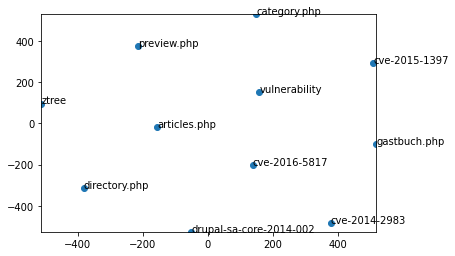

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
display_closestwords_tsnescatterplot(model, 'vulnerability', 100)

In [ ]:
from gensim.models import Word2Vec, KeyedVectors   
model.wv.save_word2vec_format('model.bin', binary=True)

In [ ]:
aug = naw.WordEmbsAug(model_type='word2vec',model_path='model.bin')

In [ ]:
L=['targets(e2,e1)','hascharacteristics(e2,e1)']
te=[]
r=[]
for i in L:
  for t in (df[df['relation']==i].index.tolist()):
    context=df[df['relation']==i]['text'][t]
    context=context.replace('<e1>','"')
    context=context.replace('</e1>','"')
    context=context.replace('<e2>','"')
    context=context.replace('</e2>','"')
    aug_text=aug.augment(context, n=3)
    for j in aug_text:
      j=j.replace('" ','<e1>')
      j=j.replace(' "','</e1>')
      j=j.replace('" ','<e2>')
      j=j.replace(' "','</e2>')
      te.append(j)
      r.append(i)

In [ ]:
text=[]
rel=[]
for i in to_aug:
  for t in (df[df['relation']==i].index.tolist()):
    context=df[df['relation']==i]['text'][t]
    context=context.replace('<e1>','"')
    context=context.replace('</e1>','"')
    context=context.replace('<e2>','"')
    context=context.replace('</e2>','"')
    aug_text=aug.augment(context, n=30)
    for j in aug_text:
      j=j.replace('" ','<e1>')
      j=j.replace(' "','</e1>')
      j=j.replace('" ','<e2>')
      j=j.replace(' "','</e2>')
      text.append(j)
      rel.append(i)

In [ ]:
aug_data=pd.DataFrame({
    'text':te,
    'relation':r
})

In [ ]:
#aug_data.to_csv('/drive/My Drive/inputforRE.csv')

In [ ]:
data1=pd.read_csv('/drive/My Drive/inputforRE.csv')

In [ ]:
data1.head()

,Unnamed: 0,text,relation
0,0,"Of note, a unique string is present which may ...","hascharacteristics(e1,e2)"
1,1,"Of note, a unique string is present which may ...","hascharacteristics(e1,e2)"
2,2,"Of note, what-you-see-is-what-you-get unique s...","hascharacteristics(e1,e2)"
3,3,"Of note, a unique string is present which may ...","hascharacteristics(e1,e2)"
4,4,"Of note, a unique string is deficiences which ...","hascharacteristics(e1,e2)"


In [ ]:
data1['relation'].unique()

array(['hascharacteristics(e1,e2)', 'authored(e2,e1)', 'exploits(e1,e2)',
       'belongsto(e1,e2)', 'exploits(e2,e1)', 'hasvulnerability(e2,e1)',
       'involvesmalware(e1,e2)', 'authored(e1,e2)', 'usesmalware(e2,e1)',
       'involvesmalware(e2,e1)', 'hasvulnerability(e1,e2)',
       'belongsto(e2,e1)', 'usesmalware(e1,e2)'], dtype=object)

In [ ]:
data1=data1.drop(columns='Unnamed: 0')

In [ ]:
frames=[data1, aug_data]
re_data=pd.concat(frames)
re_data

,text,relation
0,"Of note, a unique string is present which may ...","hascharacteristics(e1,e2)"
1,"Of note, a unique string is present which may ...","hascharacteristics(e1,e2)"
2,"Of note, what-you-see-is-what-you-get unique s...","hascharacteristics(e1,e2)"
3,"Of note, a unique string is present which may ...","hascharacteristics(e1,e2)"
4,"Of note, a unique string is deficiences which ...","hascharacteristics(e1,e2)"
...,...,...
820,The following fourteen questions try to forÂ r...,"hascharacteristics(e2,e1)"
821,The following fourteen questions try to ascert...,"hascharacteristics(e2,e1)"
822,The cost of JS sniffers ranges from $ 250 to $...,"hascharacteristics(e2,e1)"
823,The cost automobiles.Â JS sniffers ranges fro...,"hascharacteristics(e2,e1)"


In [ ]:
re_data.reset_index(drop=True, inplace=True)
re_data

,text,relation
0,"Of note, a unique string is present which may ...","hascharacteristics(e1,e2)"
1,"Of note, a unique string is present which may ...","hascharacteristics(e1,e2)"
2,"Of note, what-you-see-is-what-you-get unique s...","hascharacteristics(e1,e2)"
3,"Of note, a unique string is present which may ...","hascharacteristics(e1,e2)"
4,"Of note, a unique string is deficiences which ...","hascharacteristics(e1,e2)"
...,...,...
25480,The following fourteen questions try to forÂ r...,"hascharacteristics(e2,e1)"
25481,The following fourteen questions try to ascert...,"hascharacteristics(e2,e1)"
25482,The cost of JS sniffers ranges from $ 250 to $...,"hascharacteristics(e2,e1)"
25483,The cost automobiles.Â JS sniffers ranges fro...,"hascharacteristics(e2,e1)"


In [ ]:
re_data = re_data.loc[re_data["relation"] != "hascharacteristics(e1,e2)"]

In [ ]:
def nth_repl(s, sub, repl, n):
    find = s.find(sub)
    # If find is not -1 we have found at least one match for the substring
    i = find != -1
    # loop util we find the nth or we find no match
    while find != -1 and i != n:
        # find + 1 means we start searching from after the last match
        find = s.find(sub, find + 1)
        i += 1
    # If i is equal to n we found nth match so replace
    if i == n:
        return s[:find] + repl + s[find+len(sub):]
    return s

In [ ]:
data1=re_data.copy()

In [ ]:
data1.reset_index(drop=True, inplace=True)

In [ ]:
for i in range (data1.shape[0]):
  data1['text'][i]=data1['text'][i].replace('<e1>','<e1>')
  data1['text'][i]=data1['text'][i].replace('</e1>','<e1>')
  data1['text'][i]=data1['text'][i].replace('<e2>','<e1>')
  data1['text'][i]=data1['text'][i].replace('</e2>','<e1>')
  data1['text'][i]=nth_repl(data1['text'][i],'<e1>','</e1>',2)
  data1['text'][i]=nth_repl(data1['text'][i],'<e1>','<e2>',2)
  data1['text'][i]=nth_repl(data1['text'][i],'<e1>','</e2>',2)
  data1['text'][i]=data1['text'][i].replace('<e1> ','<e1>')
  data1['text'][i]=data1['text'][i].replace(' </e1>','</e1>')
  data1['text'][i]=data1['text'][i].replace('<e2> ','<e2>')
  data1['text'][i]=data1['text'][i].replace(' </e2>','</e2>')

In [ ]:
todelete=['runssoftware(e2,e1)','usesdropper(e1,e2)','attributedto(e1,e2)']
df.loc[df["relation"].isin(todelete),'relation']='other'

In [ ]:
frames=[df, data1]
re_data=pd.concat(frames)
re_data

,text,relation
0,New Version of OSX.SabPub & Confirmed Mac APT ...,"hasattacktime(e1,e2)"
1,"While analysing <e1>SabPub</e1> , we discovere...","indicates(e2,e1)"
2,"While analysing <e1>SabPub</e1> , we discovere...","indicates(e2,e1)"
3,The remaining two drop <e1>SabPub</e1> . The m...,"indicates(e2,e1)"
4,The remaining two drop <e1>SabPub</e1> . The m...,"indicates(e2,e1)"
...,...,...
12070,The following fourteen questions try to forÂ r...,"hascharacteristics(e2,e1)"
12071,The following fourteen questions try to ascert...,"hascharacteristics(e2,e1)"
12072,The cost of JS sniffers ranges from $ 250 to $...,"hascharacteristics(e2,e1)"
12073,The cost automobiles.Â JS sniffers ranges fro...,"hascharacteristics(e2,e1)"


In [ ]:
re_data.reset_index(drop=True, inplace=True)
re_data

,text,relation
0,New Version of OSX.SabPub & Confirmed Mac APT ...,"hasattacktime(e1,e2)"
1,"While analysing <e1>SabPub</e1> , we discovere...","indicates(e2,e1)"
2,"While analysing <e1>SabPub</e1> , we discovere...","indicates(e2,e1)"
3,The remaining two drop <e1>SabPub</e1> . The m...,"indicates(e2,e1)"
4,The remaining two drop <e1>SabPub</e1> . The m...,"indicates(e2,e1)"
...,...,...
32677,The following fourteen questions try to forÂ r...,"hascharacteristics(e2,e1)"
32678,The following fourteen questions try to ascert...,"hascharacteristics(e2,e1)"
32679,The cost of JS sniffers ranges from $ 250 to $...,"hascharacteristics(e2,e1)"
32680,The cost automobiles.Â JS sniffers ranges fro...,"hascharacteristics(e2,e1)"


In [ ]:
re_data['relation'].value_counts()

hasattacklocation(e1,e2)     6759
indicates(e2,e1)             3023
hasproduct(e1,e2)            2808
authored(e2,e1)              2635
hasproduct(e2,e1)            1633
exploits(e1,e2)              1457
hasattacklocation(e2,e1)     1363
usesmalware(e1,e2)           1240
belongsto(e2,e1)             1116
hasvulnerability(e1,e2)      1085
hasattacktime(e1,e2)         1065
hasattacktime(e2,e1)          911
indicates(e1,e2)              860
usesmalware(e2,e1)            713
involvesmalware(e2,e1)        713
authored(e1,e2)               682
involvesmalware(e1,e2)        682
targets(e2,e1)                636
targets(e1,e2)                590
other                         498
hasvulnerability(e2,e1)       496
hascharacteristics(e2,e1)     464
hascharacteristics(e1,e2)     447
exploits(e2,e1)               434
belongsto(e1,e2)              372
Name: relation, dtype: int64

In [ ]:
X_train=df['text'].tolist()
y_train=df['relation'].tolist()

In [ ]:
import re
# remove extra spaces and ending space if any
spaces = ['\u200b', '\u200e', '\u202a', '\u202c', '\ufeff', '\uf0d8', '\u2061', '\x10', '\x7f', '\x9d', '\xad', '\xa0']
def remove_space(text):
    for space in spaces:
        text = text.replace(space, ' ')
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return text

In [ ]:
train = open("/drive/My Drive/train.txt", "w")
for i in range (len(X_train)):
  num_sent=i+1
  row=str(num_sent)+"   "+'"'+ (remove_space(X_train[i]).lower()).capitalize() +'"'
  train.write(row)
  train.write("\n")
  train.write(y_train[i])
  train.write("\n")
  train.write("\n")
train.close()
for j in range (len(X_test)):
